In [1]:
"""
"""

'\n'

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# DATE = 230618
# animal = "Diego"

DATE = 220716
animal = "Pancho"


Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220716*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-144103
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-150716
session:  0
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220716*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-144103
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-150716
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [1, 3]
Beh Sessions that exist on this date:  {220716: [(1, 'priminvar3b'), (3, 'priminvar3b')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['priminvar3b']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220716*/**
Found

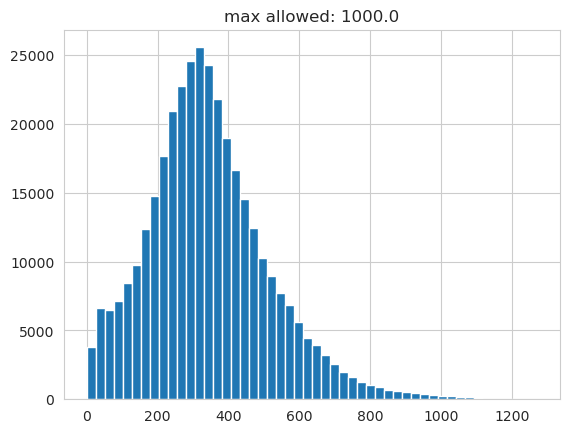

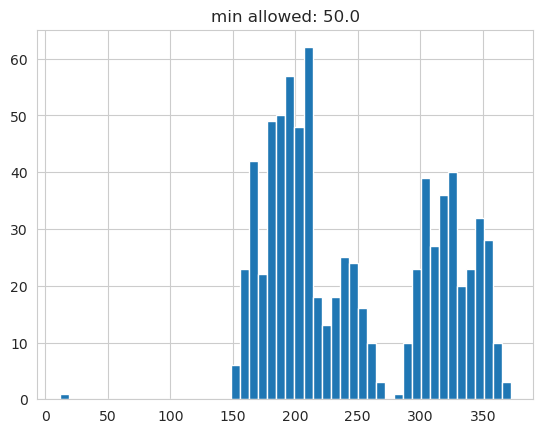

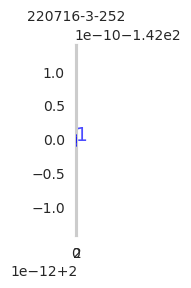

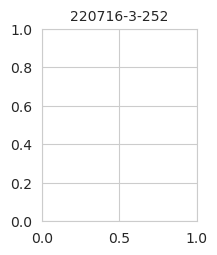

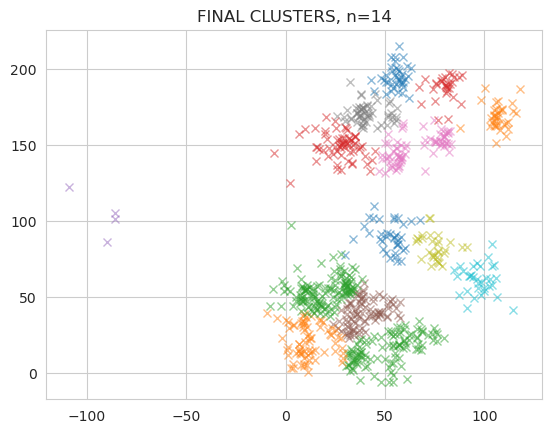

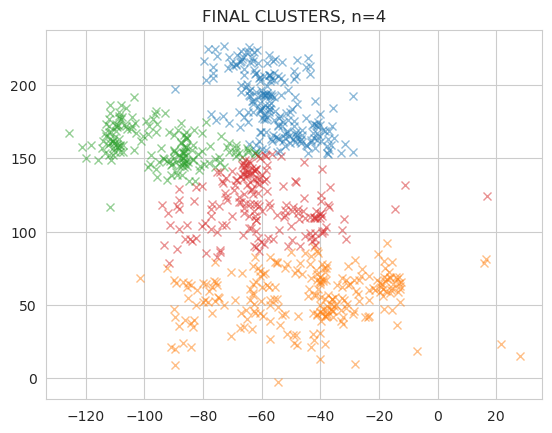

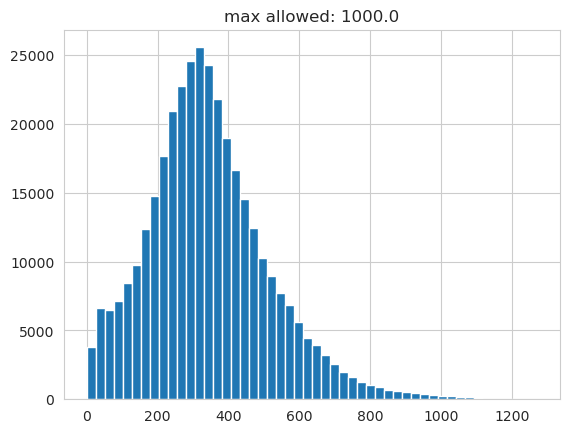

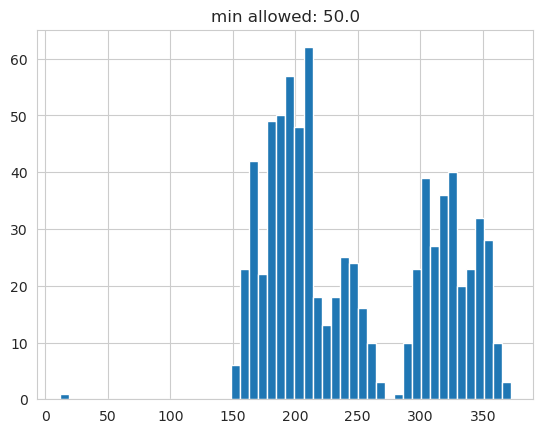

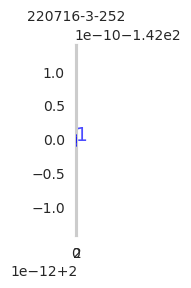

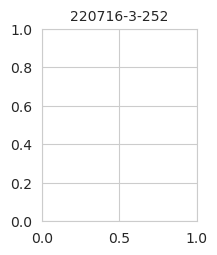

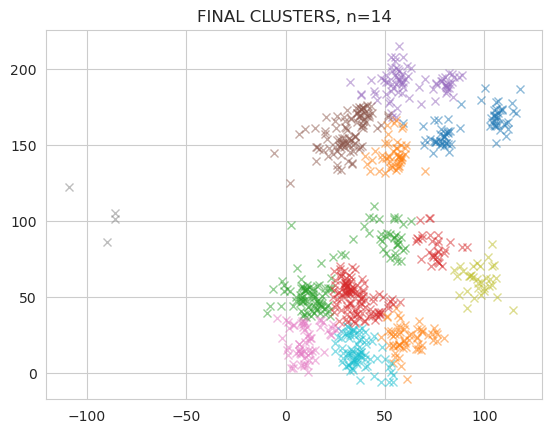

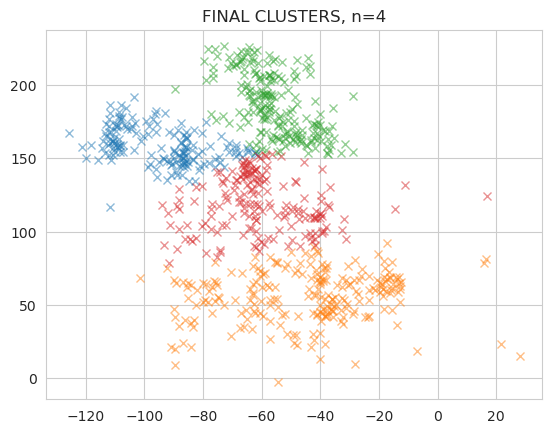

In [6]:
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="kilosort")   
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True) 


In [ ]:
# Load a single session
sess = 1
sn_KS = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="kilosort")

# Load a single session
sess = 1
sn_TD = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="tdt")

# Kilosort debugging

### Compare ks to tdt 

In [ ]:
sn = MS.SessionsList[3]
savedir = "/tmp/ksgood"
sn.ks_plot_compare_tdt_to_kilosort("/tmp")

### Kilosort, get time global of start of current session, for extracting time of tdt spikes

In [ ]:
from neuralmonkey.utils.directory import rec_session_durations_extract_kilosort
out = rec_session_durations_extract_kilosort(animal, DATE)
print("-------------------------")
for k, v in out.items():
    print(k, " -- ", v)
duration_total_using_rs4_dict

sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()
# Sanity check, compare ks to tdt activity.
sn_KS.datall_TDT_KS_slice_single_bysite(1412, 0)
sn_KS.sitegetterKS_all_sites()
sn.

### Overlay spikes onto raw data

In [20]:
sn_KS = MS.SessionsList[1]

In [ ]:
sn_KS.SPIKES_VERSION = "kilosort"
sn_KS._SPIKES_VERSION_INPUTED = "kilosort"

In [21]:
sn_KS.sitegetterKS_all_sites()

[1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1330,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,

In [22]:
site = 1273
trial = sn_KS.get_trials_list(True)[-2]
print(sn_KS.sitegetterKS_thissite_info(site))

{'site_tdt': 460, 'clust': 1273, 'region': 'preSMA_p', 'rs': 3, 'chan': 204}


In [28]:
sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Pancho*/*220716*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-144103
---
/home/lucas/mnt/Freiwald/ltian/recordings/Pancho/220716/Pancho-220716-150716
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/*Pancho*/*220716*/*Pancho*220716**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/Pancho/220716/Pancho-220716-144103
---
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/Pancho/220716/Pancho-220716-150716
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [524.0987, 10478.729684]
...  onsets_using_rs4_each_rs : {2: [0.0, 524.12362752], 3: [0.0, 524.12362752]}
...  offsets_using_rs4_each_rs : {2: [524.12362752, 11002.9037568], 3: [524.12362752, 11002.90379776]}
...  durations_each_sess_rs4_keyed_by_rs : {2: [524.12362752, 10478.78012928], 3: [524.12362752, 10478.78017024]}


{2: 524.12362752, 3: 524.12362752}

(<Figure size 2500x500 with 1 Axes>, <Axes: >)

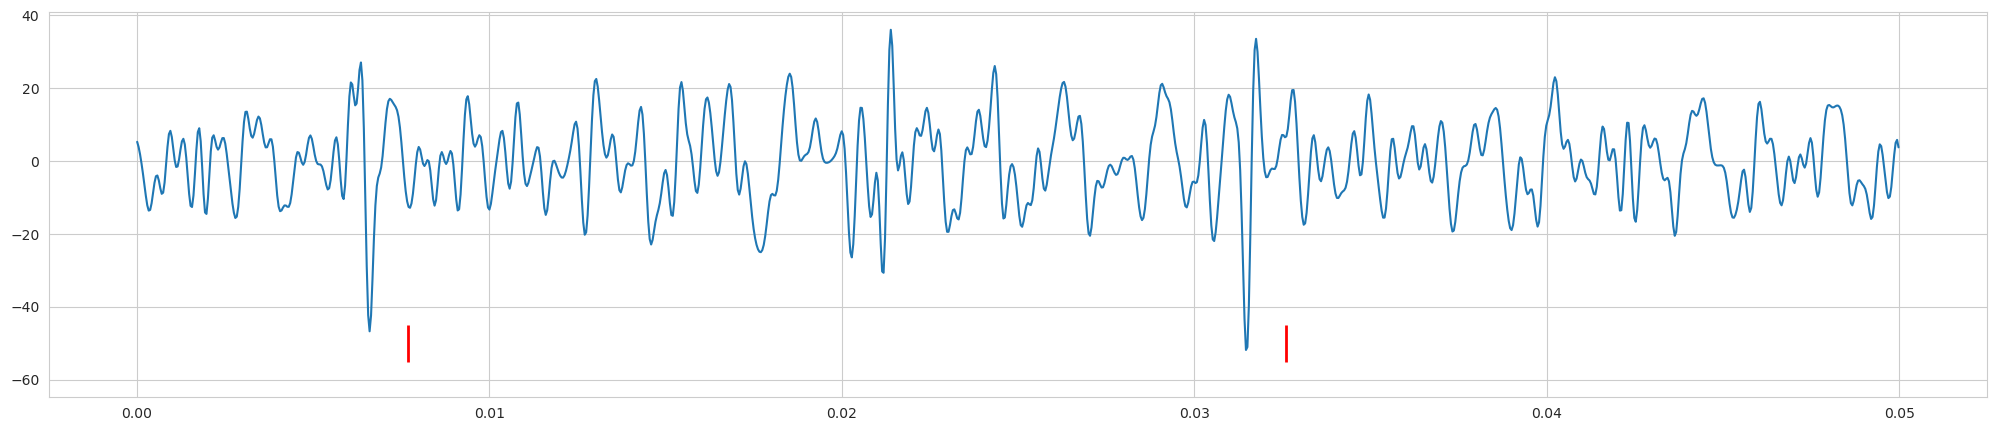

In [25]:

twind_plot = None
twind_plot = [0.2, 0.25]
sn_KS.plot_raw_overlay_spikes_on_raw_filtered(site, trial, twind_plot)
sn_KS.ks_plot_compare_overlaying_spikes_on_raw_filtered(site, trial)

### Plot example raster

In [ ]:
for t in trials:
    assert sn_KS.datasetbeh_trial_to_trialcode(t)==sn_TD.datasetbeh_trial_to_trialcode(t)
    assert sn_KS.datasetbeh_trial_to_datidx(t)==sn_TD.datasetbeh_trial_to_datidx(t)
    
assert np.all(sn_TD.Datasetbeh.Dat["trialcode"] == sn_KS.Datasetbeh.Dat["trialcode"])

In [ ]:
sn_KS._CachedTrialOnset == sn_TD._CachedTrialOnset


In [ ]:
sn_KS.RecPathBaseLocal

In [ ]:

sn_KS._CachedTrialOnset 

In [ ]:
site = 125
trials = sn_TD.get_trials_list(True)
sn_TD.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

In [ ]:
site = 1127

site = 7
sn_KS.sitegetterKS_thissite_info(site)

In [ ]:
trials = sn_KS.get_trials_list(True)
sn_KS.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

##### Fixation touch and done

In [ ]:
trial = 813
sn.beh_extract_touch_in_done_button(trial,  ploton=True)

In [ ]:
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=48, ploton=True)
trial = 114
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=52, ploton=True)
times, touch = sn.beh_extract_touch_in_fixation_square(trial, ploton=True)



# Debugging event extraction (e.g., photodiode)

##### Sanity checks across trialsm

In [ ]:
# Compare times of events, e..g, make sure done alway soccurs after 
for trial in sn.get_trials_list(True):
    print(trial)
    
    tmp = sn.events_get_times_as_array(trial, ["fixtch", "go", "doneb"])
    if np.isnan(tmp[2]):
        continue
    else:
#         print(tmp[2] - tmp[1])
        assert (tmp[2] - tmp[1])>0
        

In [ ]:
# trial = 594
event = "fixtch"
for trial in sn.get_trials_list(True):
    a = sn.events_get_time_using_photodiode(trial, list_events=[event])
    b = sn.events_get_time_using_photodiode(trial, list_events=[event], do_reextract_even_if_saved=True)
    print(trial, a, b, a==b)
    if len(a[event])>0:
        assert np.abs(a[event][0]-b[event][0])<0.01


##### Plot pd

In [ ]:
%matplotlib inline
trial = 114 
event = "fixtch"
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, 
                                    do_reextract_even_if_saved=True)


In [ ]:
import numpy as np
np.linspace(-0.015, 0.055, 50)

In [ ]:
np.linspace(-0.045, 0.045, )

In [ ]:
np.linspace(1,10)


In [ ]:
print(10)

In [ ]:
sn.events_get_time_sorted(trial, ["fixcue", "fixtch"])[0]

In [ ]:
trial = 594
%matplotlib inline

sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, overwrite=True)

##### Problem: fixtouch even before fixation cue onset

In [ ]:
# Solution: detect cases. call the onset the same time as fixcue onset.

In [ ]:
for t in sn.get_trials_list(True):
    if sn.beh_check_touching_fixation_square_during_onset(t):
        print(t)

In [ ]:
touch.shape

#### Plot

In [ ]:
sn.extract_data_tank_epocs("camtrialoff")

In [ ]:
sn.DatTank["epocs"]

In [ ]:
# sn.DatTank["streams"]["Mic1"]
# sn.DatTank["streams"]["PhD2"]
# sn.DatTank["streams"]["Eyee"]
sn.DatTank["streams"]["PhDi"]

In [ ]:
%matplotlib inline
sites = sn.sitegetter_all()
sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=False,  overlay_trial_events_notpd=True)
# sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=True,  overlay_trial_events_notpd=False)



In [ ]:
trials = sn.get_trials_list(True, True)
sites = sn.sitegetter_all()
pre = -0.55
post = -0.05
sn.smoothedfr_extract_timewindow(trials, sites, "first_raise", pre, post)

sn.events_get_time_using_photodiode(269, list_events=["first_raise"], plot_beh_code_stream = True, overwrite=True)

In [ ]:
sn.plotwrapper_raster_oneetrial_multsites(269, sites[:10])

#####